<a href="https://colab.research.google.com/github/Adarsh-Saurabh/AI-Champ-/blob/main/Snapchat_filter_Applicable_to_photos_using_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

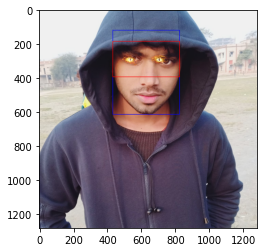

In [ ]:
!pip install mtcnn
!pip install opencv-python
from mtcnn import MTCNN
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Importing necessary libraries
import cv2
import numpy as np
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# Reading images and filters and converting them to their relevant format
image = cv2.imread('Mohit.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
glass = cv2.cvtColor(cv2.imread("fire.png") , cv2.COLOR_BGRA2RGBA)

# Using mtcnn for detecting if the image has face or not
mtcnn = MTCNN()
faces = mtcnn.detect_faces(image)

# Counting total no of faces 
for face in faces:
    # Making face rectangle and definying coordinates of eyes
    cv2.rectangle(image, (face['box'][0], face['box'][1]), (face['box'][0]+face['box'][2], face['box'][1]+face['box'][3]), (0, 0, 255), 2)
    a , b , c , d = face['box']
    left_eye = face['keypoints']['left_eye']
    right_eye = face['keypoints']['right_eye']
    x1 , y1 = left_eye
    x3 , y3 = right_eye

    # Here we are defining universal size of eyes. We are taking the width of the face rectangle as the eye rectangle and the we are taking the 
    # height of the face image and dividing it by 5 this is half the height of the glass image
    x1 = a
    x3 = a + c
    half_height = int(d/5)
    y1 = y1 - half_height
    y3 = y3 + half_height

    eye = cv2.rectangle(image , (x1,y1) , (x3,y3) , (255 , 0 , 0) , 2)
    
    # Resizing the glass image according to the size of the eyes rectangle and doing somethings I dont completely understand
    glass = cv2.resize(glass , ((x3-x1) , (y3 - y1) ) )
    alpha_glass =   glass[:,:,-3] / 255
    alpha_back =  1 - alpha_glass

    # Adding each grid of the image with the filter image(glasses image)
    for c in range(0,3):
        image[y1:y3 , x1:x3 , c ] = ( alpha_back * image[y1:y3 , x1:x3 , c ] + alpha_glass * glass[:,:,c] )
  
plt.imshow(image)
plt.imsave('Mohit.png' , image)